copyrite 
This notebook will introduce a python implementation of the lattice boltzmann method. 

# The Boltzmann Equation

# The Lattice Boltzmann Method

# Lattice Velocity, Viscosity, Spacial-temporal Resolution and Stability

# Representing the Lattice

Let's take a look at the D2Q9 lattice object defined in the other file. The D2Q9 lattice has 2 dimensions and 9 directions. 

In [1]:
# from lbm_new_v4 import D2Q9
from D2Q9 import D2Q9

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

N = M = 9
sim = D2Q9(N, M)

print('D2Q9 Properties')
print('===========')
for key in sim.__dict__.keys():
    print('{}     {}'.format(key, np.shape(getattr(sim, key))))
print('')
print('------------')
for key in ['N', 'M', 'dct', 'opp', 'w', 'cs']:
    print('{}     {}'.format(key, getattr(sim, key)))


D2Q9 Properties
shape     (2,)
ndct     ()
DCT     (9, 2, 11, 11)
rho     (11, 11)
V     (2, 11, 11)
f     (9, 11, 11)
fs     (9, 11, 11)
feq     (9, 11, 11)
Frce     (2, 0)
_solid     (11, 11)
_SOLID     (9, 11, 11)
wall     (9, 11, 11)
WALL     (9, 11, 11)
WALL_DCT     (9,)
walls     (11, 11)
NOWALL     (9, 11, 11)
_eta     ()
_s     ()

------------
N     9
M     9
dct     [(0, 0), (1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]
opp     [0, 3, 4, 1, 2, 7, 8, 5, 6]
w     [0.4444444444444444, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776]
cs     0.5773502691896258


/home/jackie/Desktop/Lattice Boltzmann project/new code/lattice.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self._SOLID = np.array([mask - mask[self.DCT[i]] for i in range(self.ndct)])


An $N$x$M$ lattice has a numerical domain of size $N+2$, $M+2$ because we designate nodes x={0, N}, y={0, M} as boundaries. The 9 directions *dct*, the 9 indices *opp* indicating the opposite direction; the weights *w*; and the speed *cs* in lattice units are generic properties of the D2Q9 lattice, which are defined in the class scope.

The underlying system is represented by the fluid variables $\rho$, $v_x$, and $v_y$; which are related to the particle distribution functions $f$, $f_s$, and $f_{eq}$; or the propability of finding a particle at position $(x, y)$ traveling in direction $i$. $f$ and $f_s$ correspond to the distributions just after streaming and collision respectively, and $f_{eq}$ is the equilibrium distribution computed using the local fluid variables. These fields are empty for now. 

The D2Q9 class has some build-in methods for visualizing these fields:

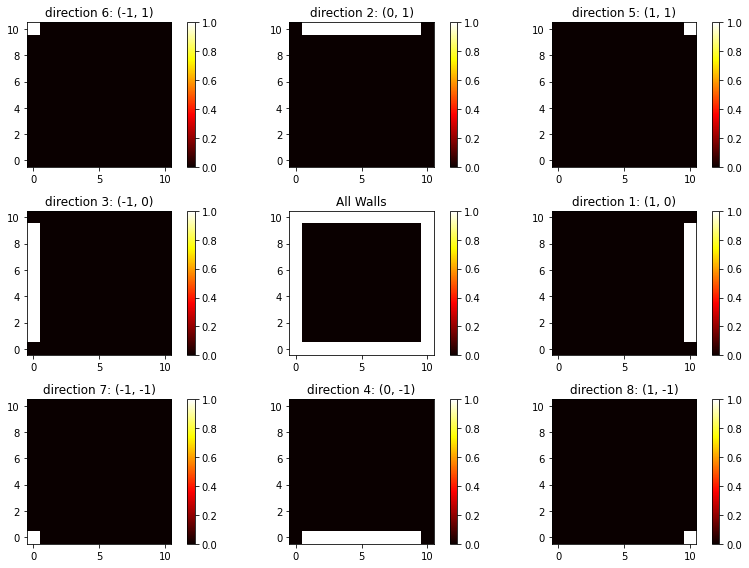

In [2]:
sim.imshow9(sim.wall)           #### Display a 9x(M+2)x(M+2) object as 9 fields corresponding to dct[i]
plt.subplot(3, 3, 5)
sim.imshow(sim.walls)           #### Display a single (N+2)x(M+2) field as a tilemap
plt.title('All Walls')
plt.tight_layout()
# plt.suptitle('Walls Correspondin to Each Direction')
plt.show()


Above, we can see the segment of the boundary which corresponds to each direction. 

# Streaming

To visualize streaming, suppose we have at $t=0$ the condition $f_0 = 1$ everywhere, and all other $f_i = 1$ at only one specific lattice point $x_0, y_0$, and zero everywhere else. Physically, this means that we have a uniform density of stationary particles everywhere, except for at one point $x_0, y_0$ where we are also equally likely to find a particle travelling in any particular direction. Let's see what this looks like:

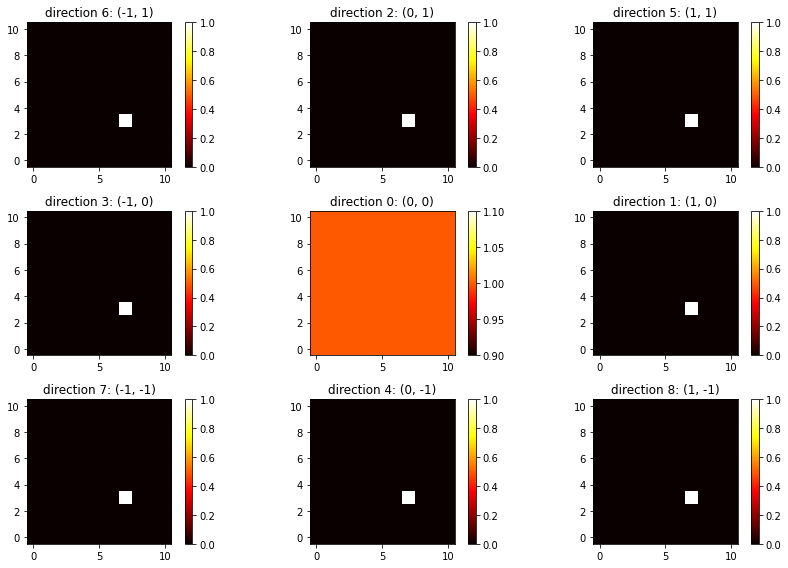

In [3]:
sim.f *= 0
sim.f[0] = 1
sim.f[:, 6, 2] = 1          #### Instantiate f=1 at a random point in all directions
# sim.f[:, 5, 5]
sim.imshow9(sim.f, middle=True)
plt.show()

Note that with our current formulation, the density $\rho = \sum f_i$ is higher at $x_0, y_0$ than at any other point. Physically, this is because we are just as likely to find a stationary particle at $x_0, y_0$ as anywhere else (since $f_0(x_0, y_0) = 1$), but we *also* have a chance of finding a *moving* particle. To see this more clearly, in the center let's plot $\sum f_i$ instead of $f_0$:

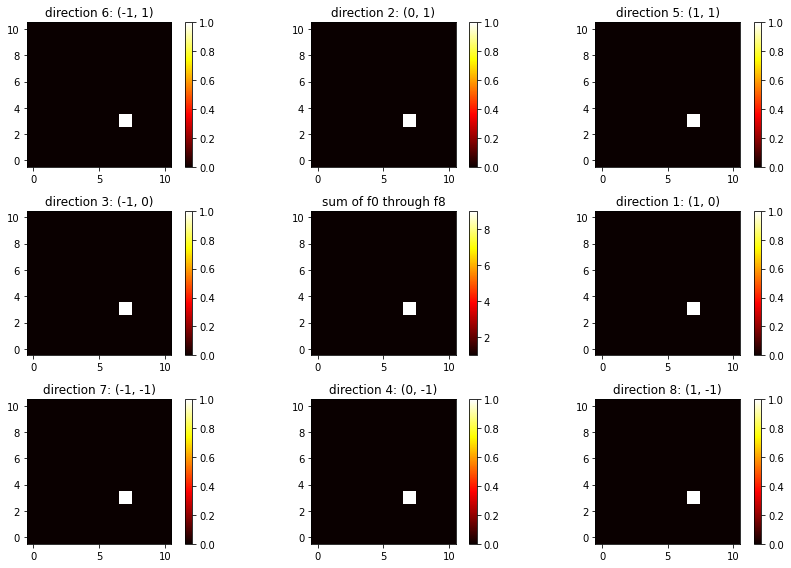

In [4]:
sim.imshow9(sim.f)
plt.subplot(3, 3, 5)
sim.imshow(np.sum(sim.f, axis=0))
plt.title('sum of f0 through f8')
plt.show()

Next, let's see what happens when we iterate the system with a very large collision timescale $\tau$, so that the effects of collision are negligible

Iteration 1


/home/jackie/Desktop/Lattice Boltzmann project/new code/lattice.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fnew = [self.fs[I][self.DCT[I]] for I in range(self.ndct)]   ## Compute streaming for everything


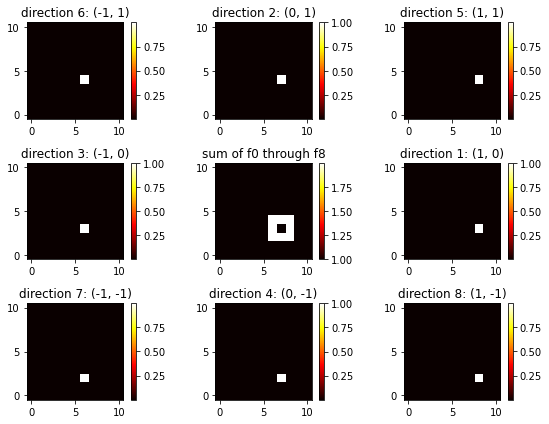

Iteration 2


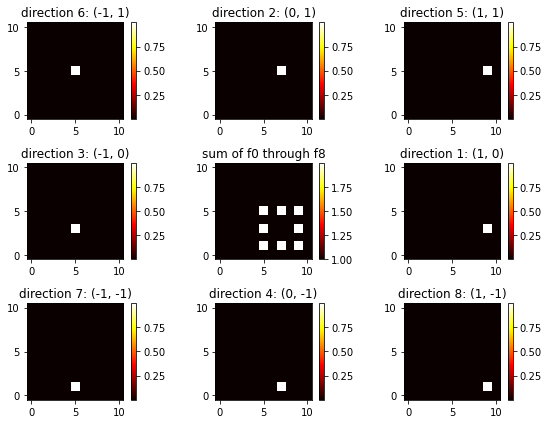

Iteration 3


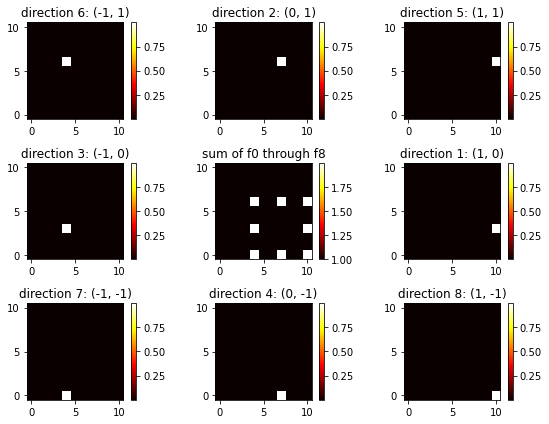

Iteration 4


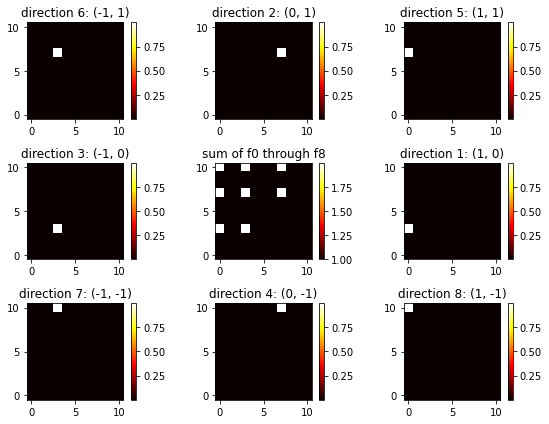

In [6]:
sim.tau = 1e6    #### Very long collision time => f = fs; i.e. collision << streaming

plt.rcParams['figure.figsize'] = (8, 6)
for i in range(4):
    print('Iteration {}'.format(i+1))
    sim.iterate()
    plt.figure(figsize=(8, 6))

    sim.imshow9(sim.f)
    plt.subplot(3, 3, 5)
    sim.imshow(np.sum(sim.f, axis=0))
    plt.title('sum of f0 through f8')
    plt.show()

We can see that the particle distribution function 'streams' to the adjacent lattice site in the corresponding direction. Note that by default, our simulation has periodic boundary conditions; i.e. if no methods are implemented to handle boundaries, then the pdf simply wraps around the edge of the domain. We will discuss other typed of boundaries in more detail later. 

# Collision

Next, let's reset the system and see what happens when we use a more standard collision timescale, i.e. $\tau=1$

Iteration 0


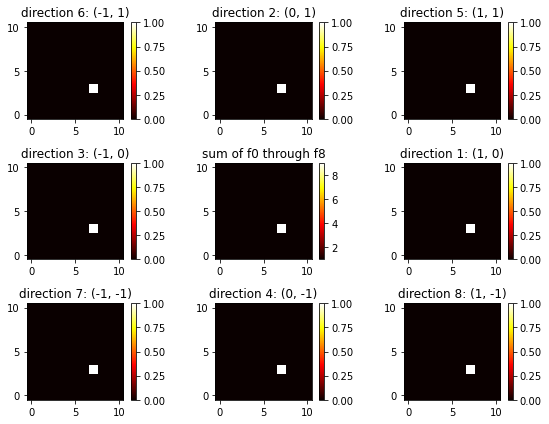

Iteration 1


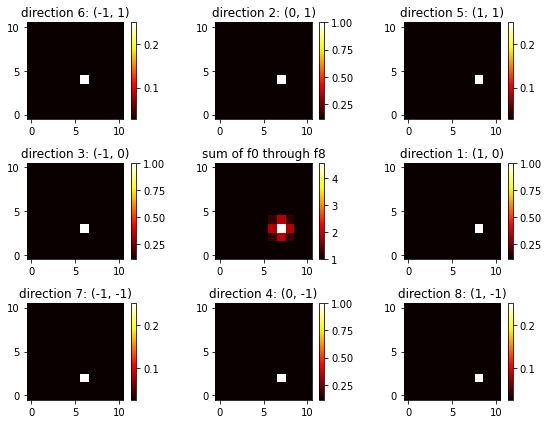

Iteration 2


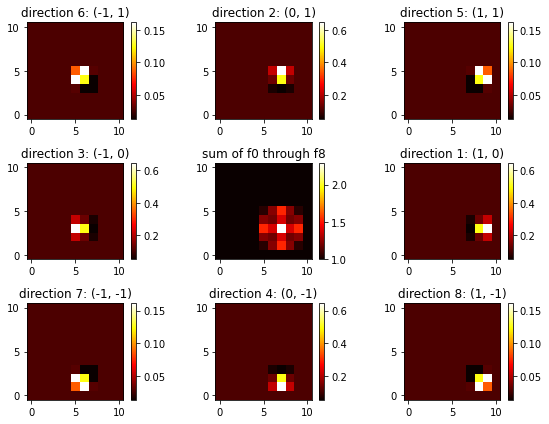

Iteration 3


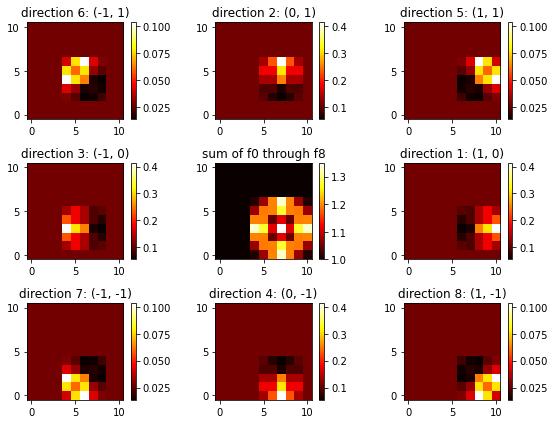

Iteration 4


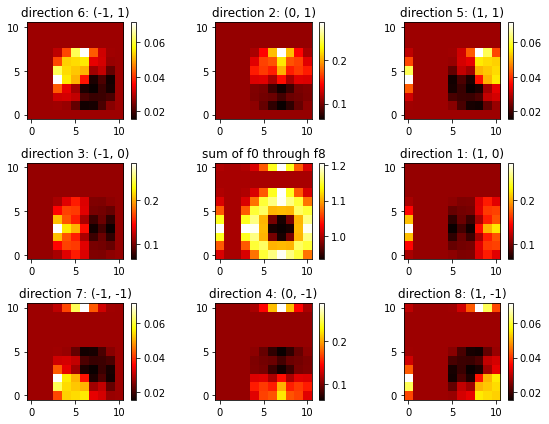

In [7]:
sim.f *= 0
sim.f[0] = 1
sim.f[:, 6, 2] = 1 
sim.tau = 1.

for i in range(5):
    print('Iteration {}'.format(i))

    sim.imshow9(sim.f)
    plt.subplot(3, 3, 5)
    sim.imshow(np.sum(sim.f, axis=0))
    plt.title('sum of f0 through f8')
    plt.show()
    
    sim.iterate()




Collision causes the pdf to 'spread-out' in space as it propagates along its direction of motion. Whereas 'pure' streaming was more deterministic, collision introduces some probability that a particle will be knocked off it's trajectory and change its position/momentum. 

From a more macroscopic perspective, the impact of collision is to bring the particle distribution functions closer to the corresponding equilibrium distributions - this phenomenon is directly captured by the collision operator in the Boltzmann equation itself. Consequently, we collision ought to cause a sharply spiked pdf to 'diffuse' over time. 

Note that on the first iteration, the sizes of the pdf's are no longer uniform. The distance traversed in a single timestep to stream to diagonal neighbors is greater than that for left-right neighbors, so particles' discrete velocity in the diagonal directions are greater; and the probability of collision is higher. This is captured in the weighting function used to calculate the equilibrium distribution.


The pdf leaves a low-'probability' "wake" in its trail. Note that collision couples the particle distribution function in one direction to the particle distribution function in other directions, so the propagations of the pdf's in each direction shown above are not independent. To better understand this, let's return to a large $\tau$ (negligible collision) system, but with the $f(x_0, y_0)$ at $t=0$ is large in only one direction:

Iteration 0


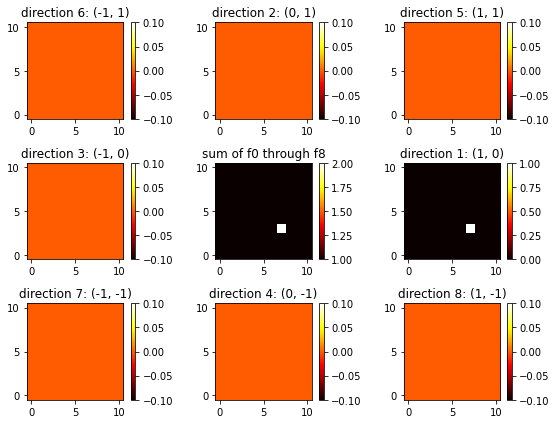

Iteration 1


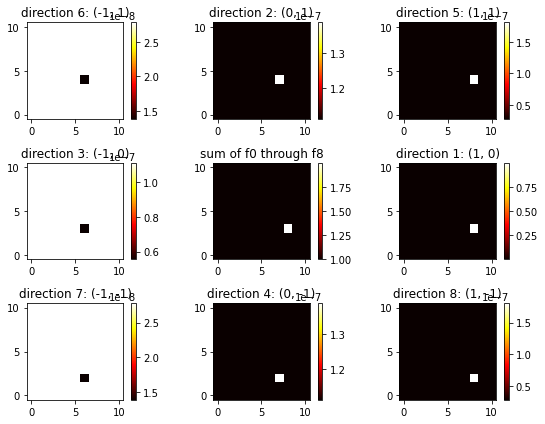

Iteration 2


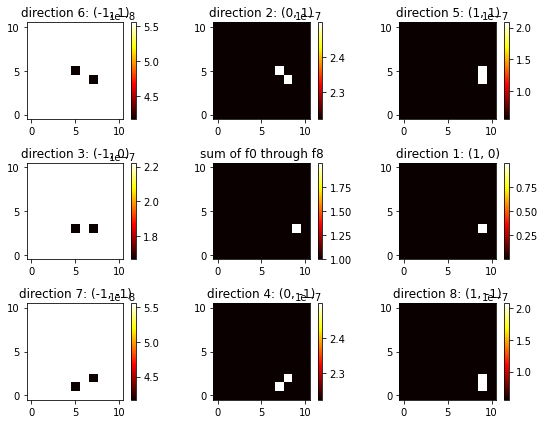

Iteration 3


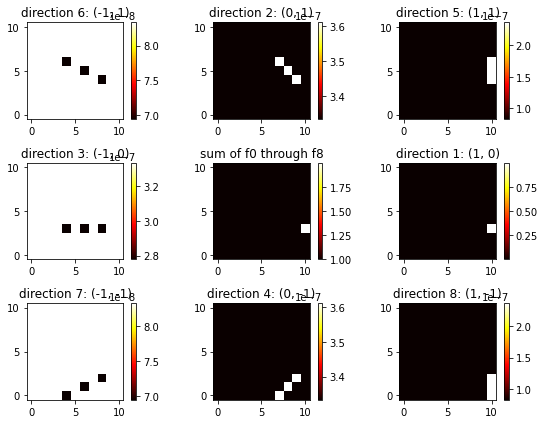

Iteration 4


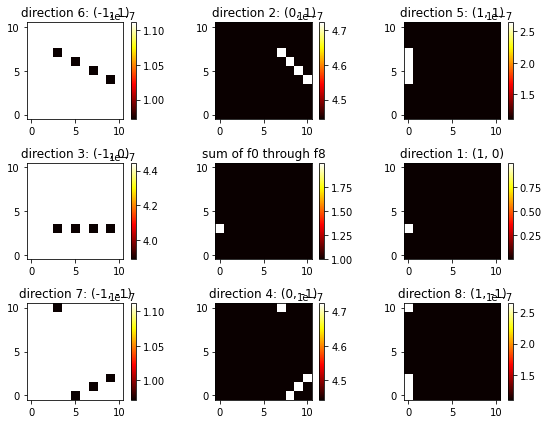

In [8]:
sim.f *= 0
sim.f[0] = 1
sim.f[1, 6, 2] = 1 
sim.tau = 1e6

for i in range(5):
    print('Iteration {}'.format(i))

    sim.imshow9(sim.f)
    plt.subplot(3, 3, 5)
    sim.imshow(np.sum(sim.f, axis=0))
    plt.title('sum of f0 through f8')
    plt.show()
    
    sim.iterate()

Now, it is clear that while propagation occurs as expected in a single direction, it also leaves propagating signatures in the pdf's for the other directions. Note, however, that for very large $\tau \approx 10^6$, these signatures scale like $1/\tau \approx 10^{-7}$ (which is why we didn't notice them until now!). However, these signatures are no longer negligible at more reasonable $\tau$; if we return to the case of $\tau=1$, we find  

Iteration 0


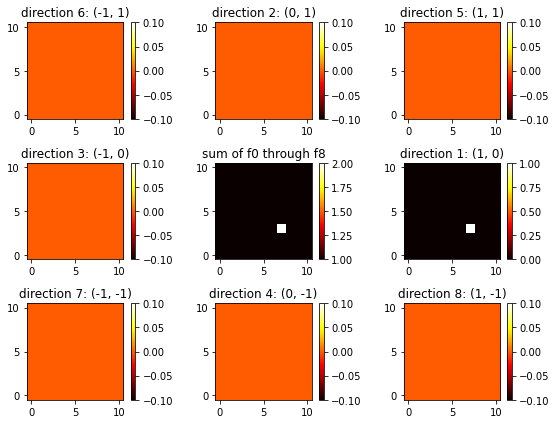

Iteration 1


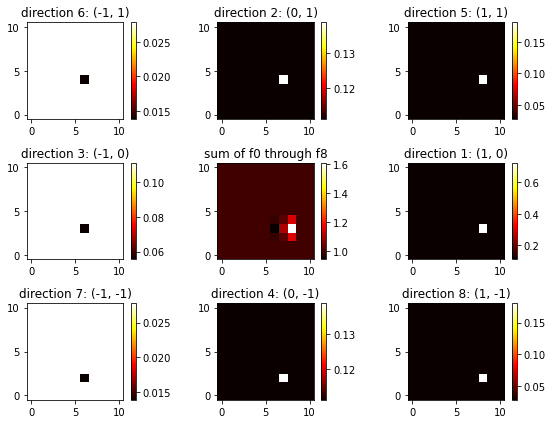

Iteration 2


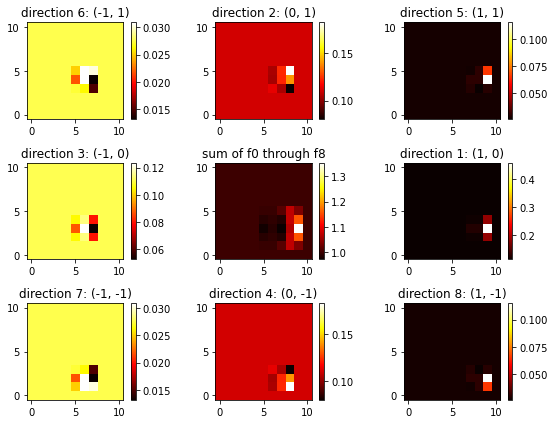

Iteration 3


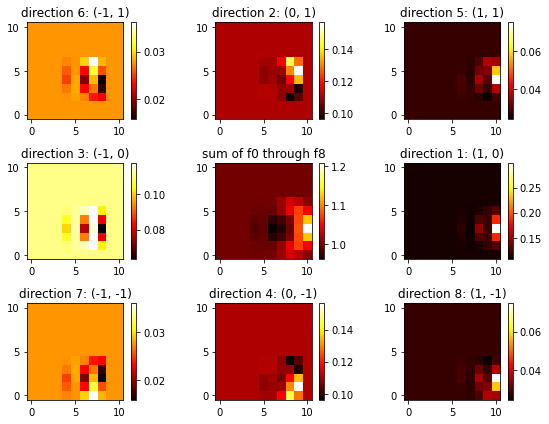

Iteration 4


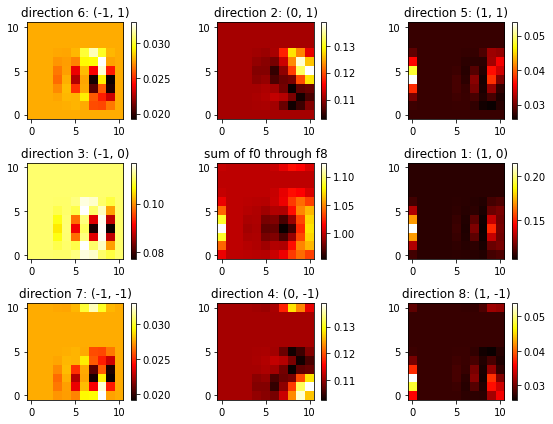

In [9]:
sim.f *= 0
sim.f[0] = 1
sim.f[1, 6, 2] = 1 
sim.tau = 1

for i in range(5):
    print('Iteration {}'.format(i))
    
    sim.imshow9(sim.f)
    plt.subplot(3, 3, 5)
    sim.imshow(np.sum(sim.f, axis=0))
    plt.title('sum of f0 through f8')
    plt.show()
    
    sim.iterate()

and it is clear that collisions add non-trivial coupling between the pdf's in different directions. 